In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

import numpy as np

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline

# import packages needed
import os
import json
import seaborn as sns
import numpy as np
import pandas as pd
import geopandas as gpd
import re
import string
import unicodedata
from bs4 import BeautifulSoup
from wordcloud import WordCloud, STOPWORDS
from matplotlib import figure
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import mapclassify

# Load the data

## Life expectancy

In [133]:
cols_life = ["MSOA11_Name", "MSOA11_Code", "Life_expectancy_male", "Life_expectancy_female"]
df_life = pd.read_excel(os.path.join("Data/life_exp_msoa.xlsx"), sheet_name = 3, usecols = cols_life)

df_life.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6789 entries, 0 to 6788
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MSOA11_Name             6789 non-null   object 
 1   MSOA11_Code             6789 non-null   object 
 2   Life_expectancy_male    6789 non-null   float64
 3   Life_expectancy_female  6783 non-null   float64
dtypes: float64(2), object(2)
memory usage: 212.3+ KB


## Income

In [134]:
cols_income = ["MSOA_code", "MSOA_name", "Region_name", "Total_annual_income"]
df_income_all = pd.read_excel(os.path.join("Data/ons-model-based-income-estimates-msoa.xls"), sheet_name = 1, usecols = cols_income)

region = 'London'
df_income = df_income_all[df_income_all.Region_name == region]

df_income.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 983 entries, 4000 to 4982
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   MSOA_code            983 non-null    object
 1   MSOA_name            983 non-null    object
 2   Region_name          983 non-null    object
 3   Total_annual_income  983 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 38.4+ KB


## House & crime & air & education

In [135]:
df_hcas = pd.read_csv(os.path.join("Data/data.csv"))

df_hcas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MSOA_Code         983 non-null    object 
 1   MSOA_Name         984 non-null    object 
 2   house_mean_price  984 non-null    float64
 3   crime_rate        983 non-null    float64
 4   PM_index          984 non-null    float64
 5   education         984 non-null    float64
dtypes: float64(4), object(2)
memory usage: 46.3+ KB


# Merge the data

In [143]:
df_hcasi = pd.merge(df_income, df_hcas,  left_on = 'MSOA_code', right_on = 'MSOA_Code', how = 'inner')
df_hcasi

,MSOA_code,MSOA_name,Region_name,Total_annual_income,MSOA_Code,MSOA_Name,house_mean_price,crime_rate,PM_index,education
0,E02000166,Camden 001,London,55000,E02000166,Camden 001,"841,157.0000",81.0000,99.0000,356.2000
1,E02000167,Camden 002,London,81600,E02000167,Camden 002,"1,288,115.0000",78.0000,101.0000,421.0000
2,E02000168,Camden 003,London,58100,E02000168,Camden 003,"658,291.0000",113.0000,105.0000,466.3000
3,E02000169,Camden 004,London,75900,E02000169,Camden 004,"1,619,090.0000",54.0000,103.0000,398.5000
4,E02000170,Camden 005,London,65400,E02000170,Camden 005,"647,544.0000",55.0000,102.0000,457.4000
...,...,...,...,...,...,...,...,...,...,...
946,E02000918,Waltham Forest 024,London,40900,E02000918,Waltham Forest 024,"279,661.0000",112.0000,107.0000,384.0000
947,E02000919,Waltham Forest 025,London,43700,E02000919,Waltham Forest 025,"237,888.0000",61.0000,105.0000,371.9000
948,E02000920,Waltham Forest 026,London,38700,E02000920,Waltham Forest 026,"225,167.0000",129.0000,102.0000,361.4000
949,E02000921,Waltham Forest 027,London,38400,E02000921,Waltham Forest 027,"211,028.0000",68.0000,102.0000,371.9000


In [144]:
df_all = pd.merge(df_hcasi, df_life, left_on = 'MSOA_code', right_on = 'MSOA11_Code', how = 'inner')
df_all

,MSOA_code,MSOA_name,Region_name,Total_annual_income,MSOA_Code,MSOA_Name,house_mean_price,crime_rate,PM_index,education,MSOA11_Name,MSOA11_Code,Life_expectancy_male,Life_expectancy_female
0,E02000166,Camden 001,London,55000,E02000166,Camden 001,"841,157.0000",81.0000,99.0000,356.2000,Camden 001,E02000166,84.3100,87.4100
1,E02000167,Camden 002,London,81600,E02000167,Camden 002,"1,288,115.0000",78.0000,101.0000,421.0000,Camden 002,E02000167,88.8100,92.7700
2,E02000168,Camden 003,London,58100,E02000168,Camden 003,"658,291.0000",113.0000,105.0000,466.3000,Camden 003,E02000168,81.2800,83.5000
3,E02000169,Camden 004,London,75900,E02000169,Camden 004,"1,619,090.0000",54.0000,103.0000,398.5000,Camden 004,E02000169,89.7400,90.5200
4,E02000170,Camden 005,London,65400,E02000170,Camden 005,"647,544.0000",55.0000,102.0000,457.4000,Camden 005,E02000170,84.4400,90.9400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,E02000918,Waltham Forest 024,London,40900,E02000918,Waltham Forest 024,"279,661.0000",112.0000,107.0000,384.0000,Waltham Forest 024,E02000918,82.9700,87.5400
946,E02000919,Waltham Forest 025,London,43700,E02000919,Waltham Forest 025,"237,888.0000",61.0000,105.0000,371.9000,Waltham Forest 025,E02000919,82.3100,86.0600
947,E02000920,Waltham Forest 026,London,38700,E02000920,Waltham Forest 026,"225,167.0000",129.0000,102.0000,361.4000,Waltham Forest 026,E02000920,79.3300,84.2400
948,E02000921,Waltham Forest 027,London,38400,E02000921,Waltham Forest 027,"211,028.0000",68.0000,102.0000,371.9000,Waltham Forest 027,E02000921,77.7400,86.7300


In [145]:
df_all.drop(df_all[((df_all.crime_rate.isna()))].index, axis=0, inplace=True)
df_all.drop(df_all[((df_all.Total_annual_income.isna()))].index, axis=0, inplace=True)
df_all.drop(df_all[((df_all.house_mean_price.isna()))].index, axis=0, inplace=True)
df_all.drop(df_all[((df_all.PM_index.isna()))].index, axis=0, inplace=True)
df_all.drop(df_all[((df_all.education.isna()))].index, axis=0, inplace=True)
df_all.drop(df_all[((df_all.Life_expectancy_male.isna()))].index, axis=0, inplace=True)
df_all.drop(df_all[((df_all.Life_expectancy_female.isna()))].index, axis=0, inplace=True)
df_all

,MSOA_code,MSOA_name,Region_name,Total_annual_income,MSOA_Code,MSOA_Name,house_mean_price,crime_rate,PM_index,education,MSOA11_Name,MSOA11_Code,Life_expectancy_male,Life_expectancy_female
0,E02000166,Camden 001,London,55000,E02000166,Camden 001,"841,157.0000",81.0000,99.0000,356.2000,Camden 001,E02000166,84.3100,87.4100
1,E02000167,Camden 002,London,81600,E02000167,Camden 002,"1,288,115.0000",78.0000,101.0000,421.0000,Camden 002,E02000167,88.8100,92.7700
2,E02000168,Camden 003,London,58100,E02000168,Camden 003,"658,291.0000",113.0000,105.0000,466.3000,Camden 003,E02000168,81.2800,83.5000
3,E02000169,Camden 004,London,75900,E02000169,Camden 004,"1,619,090.0000",54.0000,103.0000,398.5000,Camden 004,E02000169,89.7400,90.5200
4,E02000170,Camden 005,London,65400,E02000170,Camden 005,"647,544.0000",55.0000,102.0000,457.4000,Camden 005,E02000170,84.4400,90.9400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,E02000918,Waltham Forest 024,London,40900,E02000918,Waltham Forest 024,"279,661.0000",112.0000,107.0000,384.0000,Waltham Forest 024,E02000918,82.9700,87.5400
946,E02000919,Waltham Forest 025,London,43700,E02000919,Waltham Forest 025,"237,888.0000",61.0000,105.0000,371.9000,Waltham Forest 025,E02000919,82.3100,86.0600
947,E02000920,Waltham Forest 026,London,38700,E02000920,Waltham Forest 026,"225,167.0000",129.0000,102.0000,361.4000,Waltham Forest 026,E02000920,79.3300,84.2400
948,E02000921,Waltham Forest 027,London,38400,E02000921,Waltham Forest 027,"211,028.0000",68.0000,102.0000,371.9000,Waltham Forest 027,E02000921,77.7400,86.7300


In [146]:
df_all.drop(columns=['Region_name','MSOA_Code','MSOA_Name','MSOA11_Name','MSOA11_Code'], inplace=True)
df_all

,MSOA_code,MSOA_name,Total_annual_income,house_mean_price,crime_rate,PM_index,education,Life_expectancy_male,Life_expectancy_female
0,E02000166,Camden 001,55000,"841,157.0000",81.0000,99.0000,356.2000,84.3100,87.4100
1,E02000167,Camden 002,81600,"1,288,115.0000",78.0000,101.0000,421.0000,88.8100,92.7700
2,E02000168,Camden 003,58100,"658,291.0000",113.0000,105.0000,466.3000,81.2800,83.5000
3,E02000169,Camden 004,75900,"1,619,090.0000",54.0000,103.0000,398.5000,89.7400,90.5200
4,E02000170,Camden 005,65400,"647,544.0000",55.0000,102.0000,457.4000,84.4400,90.9400
...,...,...,...,...,...,...,...,...,...
945,E02000918,Waltham Forest 024,40900,"279,661.0000",112.0000,107.0000,384.0000,82.9700,87.5400
946,E02000919,Waltham Forest 025,43700,"237,888.0000",61.0000,105.0000,371.9000,82.3100,86.0600
947,E02000920,Waltham Forest 026,38700,"225,167.0000",129.0000,102.0000,361.4000,79.3300,84.2400
948,E02000921,Waltham Forest 027,38400,"211,028.0000",68.0000,102.0000,371.9000,77.7400,86.7300


In [147]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 947 entries, 0 to 949
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MSOA_code               947 non-null    object 
 1   MSOA_name               947 non-null    object 
 2   Total_annual_income     947 non-null    int64  
 3   house_mean_price        947 non-null    float64
 4   crime_rate              947 non-null    float64
 5   PM_index                947 non-null    float64
 6   education               947 non-null    float64
 7   Life_expectancy_male    947 non-null    float64
 8   Life_expectancy_female  947 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 74.0+ KB


# Mapping

# Correlation Matrix

Text(0.5, 1.0, 'Correlation Matrix')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Kaiti
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Kaiti


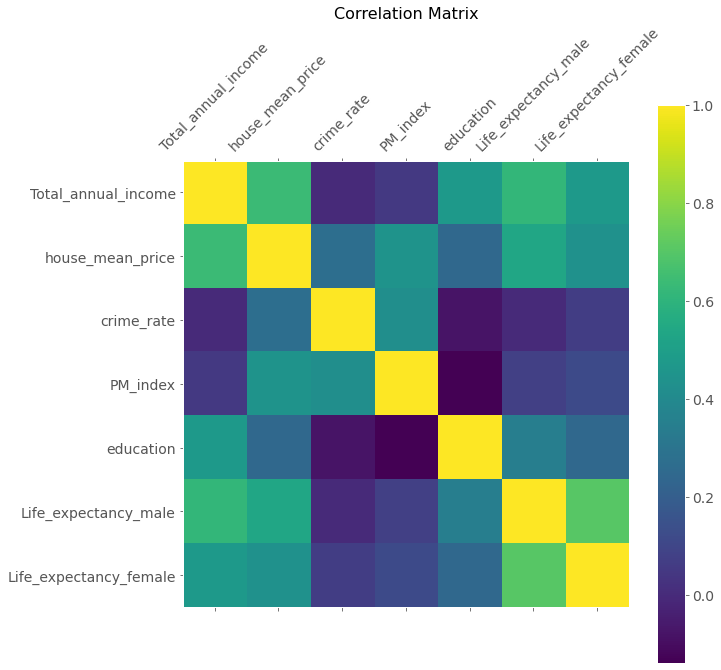

In [148]:
# to achieve this result, the two columns 'MSOA' must be dropped.
df_cm = df_all[['Total_annual_income', 'house_mean_price', 'crime_rate', 'PM_index', 'education', 'Life_expectancy_male','Life_expectancy_female']]

plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(10, 10))
plt.matshow(df_cm.corr(), fignum=f.number)
plt.xticks(range(df_cm.shape[1]), df_cm.columns, fontsize=14, rotation=45)
plt.yticks(range(df_cm.shape[1]), df_cm.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

In [149]:
import seaborn as sns

In [150]:
df_cm.corr()

,Total_annual_income,house_mean_price,crime_rate,PM_index,education,Life_expectancy_male,Life_expectancy_female
Total_annual_income,1.0000,0.6385,-0.0038,0.0480,0.4726,0.6166,0.4739
house_mean_price,0.6385,1.0000,0.2723,0.4462,0.2438,0.5365,0.4376
crime_rate,-0.0038,0.2723,1.0000,0.4241,-0.0779,-0.0050,0.0658
PM_index,0.0480,0.4462,0.4241,1.0000,-0.1390,0.0770,0.1183
education,0.4726,0.2438,-0.0779,-0.1390,1.0000,0.3469,0.2437
Life_expectancy_male,0.6166,0.5365,-0.0050,0.0770,0.3469,1.0000,0.7026
Life_expectancy_female,0.4739,0.4376,0.0658,0.1183,0.2437,0.7026,1.0000


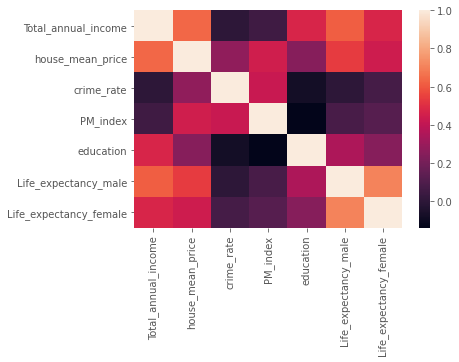

In [151]:
sns.heatmap(df_cm.corr());

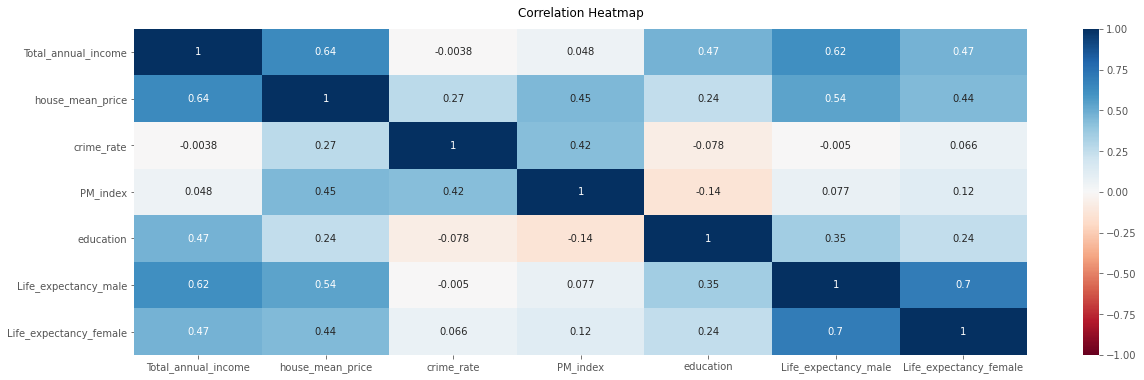

In [153]:
# Increase the size of the heatmap.
plt.figure(figsize=(20, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df_cm.corr(), vmin=-1, vmax=1, annot=True, cmap = 'RdBu')
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

# Basic plotting

In [155]:
# 设置
pd.options.display.notebook_repr_html=False  # 表格显示
plt.rcParams['figure.dpi'] = 75  # 图形分辨率
sns.set_theme(style='darkgrid')  # 图形主题

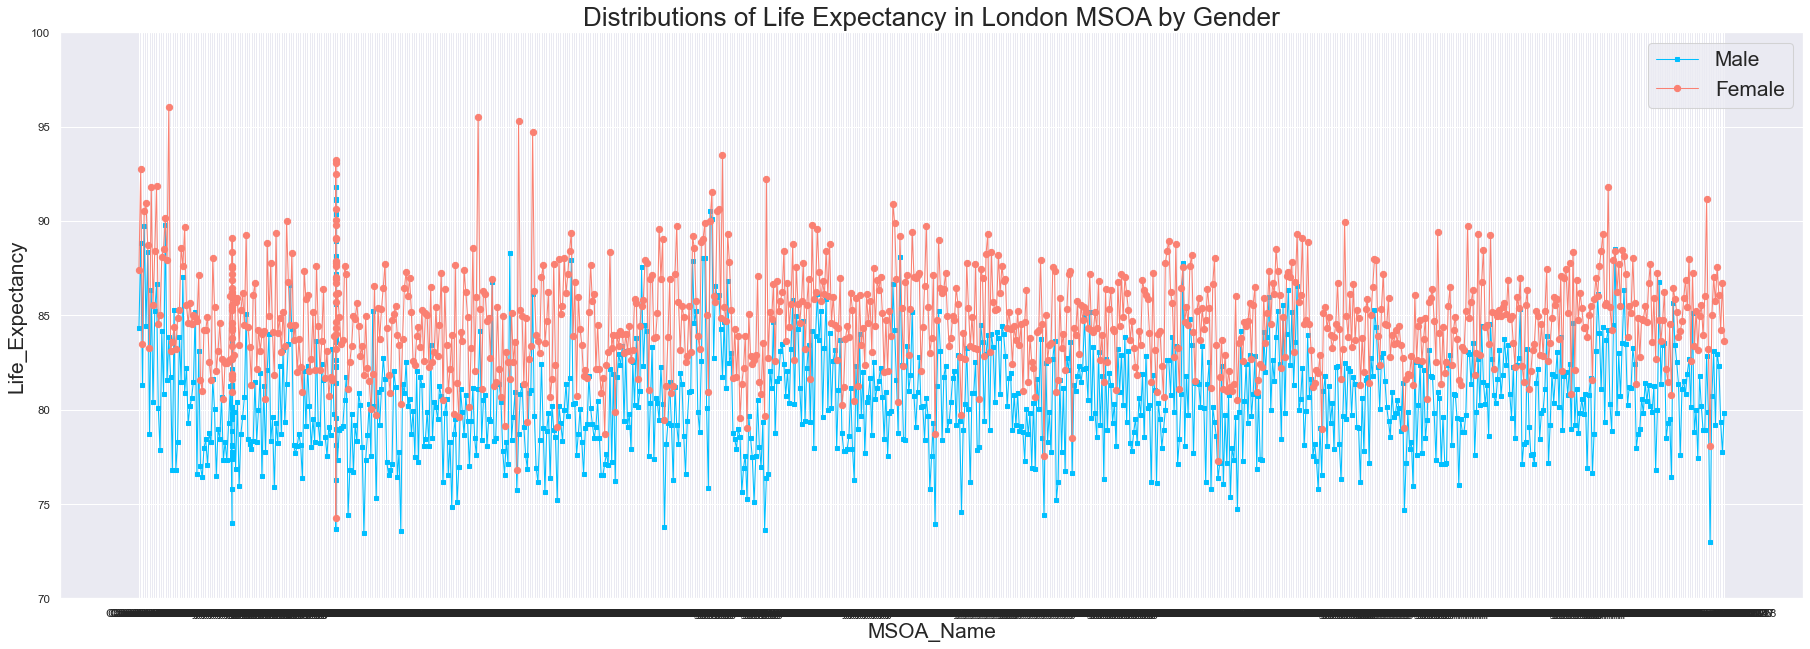

In [174]:
plt.figure(figsize=(30, 10))
#xticks(np.arange(3), ['Tom', 'Dick', 'Sue'])
x = df_all["MSOA_name"]
y1 = df_all["Life_expectancy_male"]
y2  =df_all["Life_expectancy_female"]
plt.plot(x, y1, lw=1, c='deepskyblue', marker='s', ms=4, label='Male')  # 绘制y1
plt.plot(x, y2, lw=1, c='salmon', marker='o', label='Female')  # 绘制y2
# plt-style 
#plt.xticks(np.arange(3), ['Tom', 'Dick', 'Sue'])  # x轴的刻度
#plt.xlim(0.5, 10.5)  # x轴坐标范围
plt.ylim(70, 100)  # y轴坐标范围
plt.title('Distributions of Life Expectancy in London MSOA by Gender', fontsize = (25))
plt.ylabel('Life_Expectancy', fontsize = (20))  # x轴标注
plt.xlabel('MSOA_Name', fontsize = (20))  # y轴标注
plt.legend(fontsize = (20))  # 图例
plt.show()


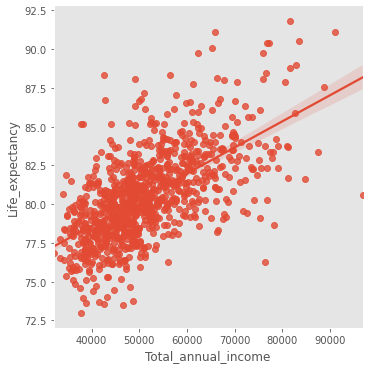

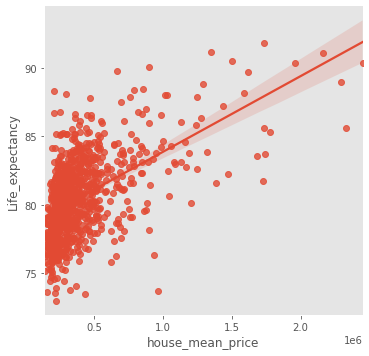

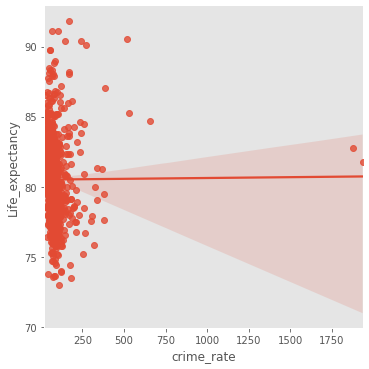

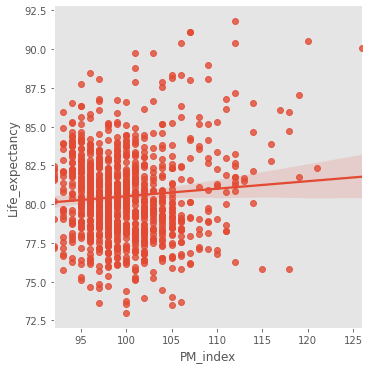

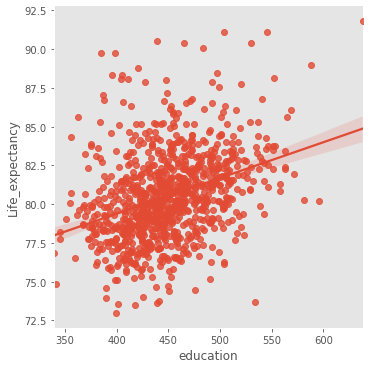

In [132]:
sns.lmplot(data = df_data, x = "Total_annual_income", y = "Life_expectancy")
sns.lmplot(data = df_data, x = "house_mean_price", y = "Life_expectancy")
sns.lmplot(data = df_data, x = "crime_rate", y = "Life_expectancy")
sns.lmplot(data = df_data, x = "PM_index", y = "Life_expectancy")
sns.lmplot(data = df_data, x = "education", y = "Life_expectancy")

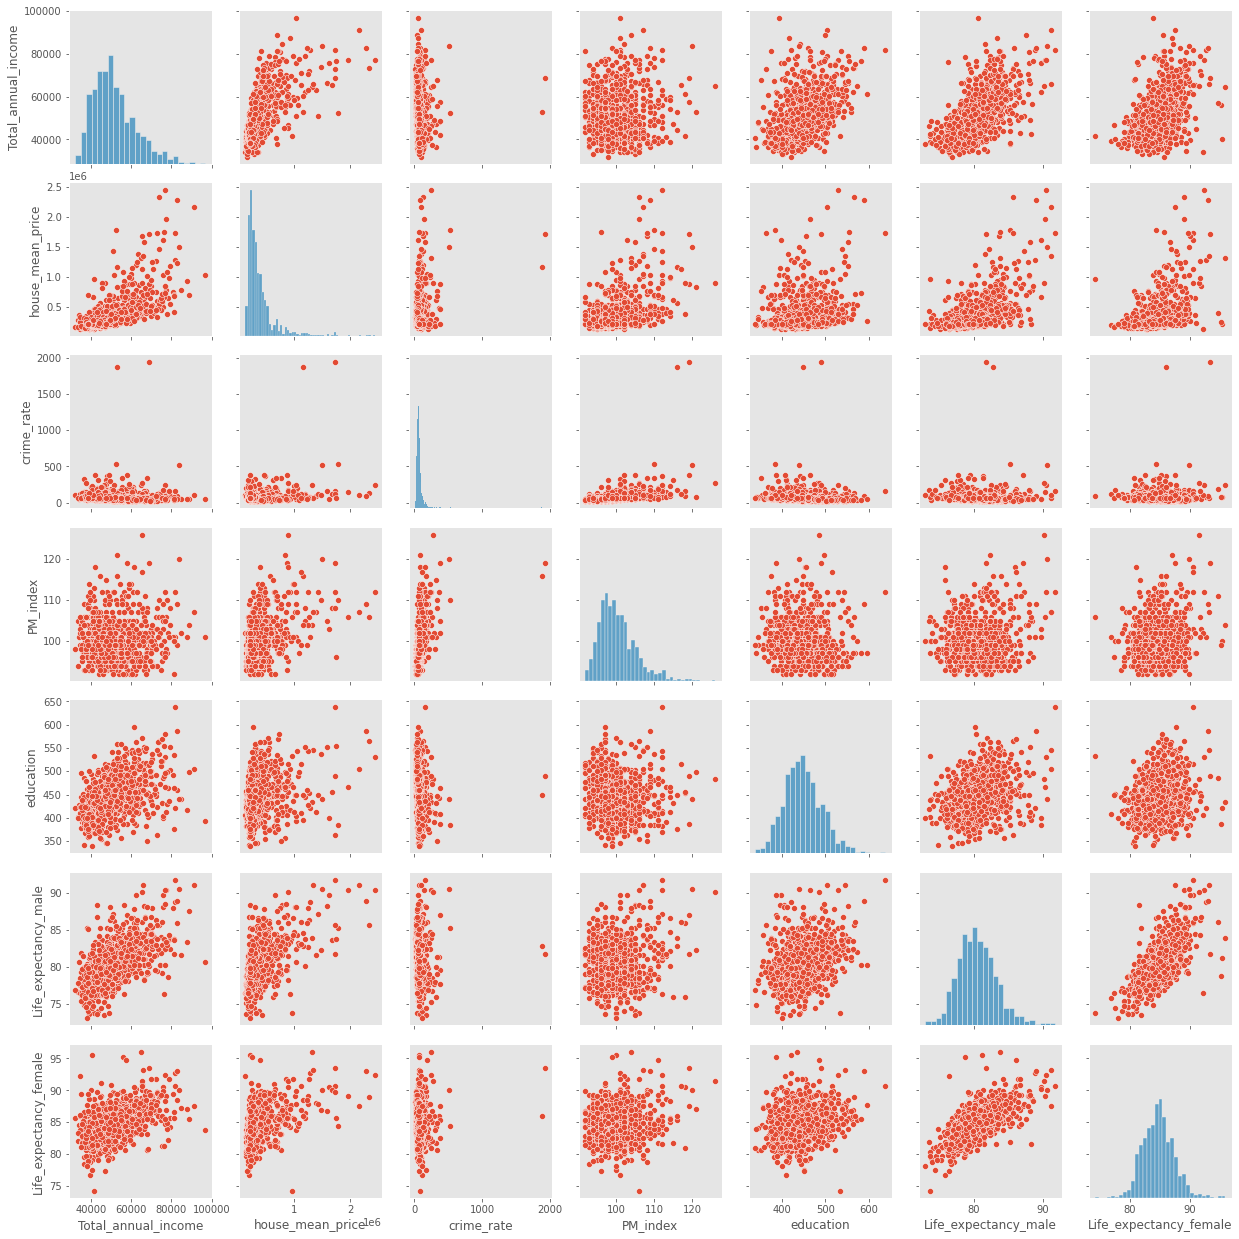

In [154]:
sns.pairplot(df_cm)
plt.show()

# Multiple Regression

## Male

In [175]:
model = sm.formula.ols('Life_expectancy_male ~ Total_annual_income + house_mean_price + crime_rate + PM_index + education', df_all).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Life_expectancy_male   R-squared:                       0.427
Model:                              OLS   Adj. R-squared:                  0.424
Method:                   Least Squares   F-statistic:                     140.1
Date:                  Tue, 18 Jan 2022   Prob (F-statistic):          4.61e-111
Time:                          05:08:34   Log-Likelihood:                -2079.2
No. Observations:                   947   AIC:                             4170.
Df Residuals:                       941   BIC:                             4199.
Df Model:                             5                                         
Covariance Type:              nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              74.0433      2.137     34.641      0.000      69.849      78.238
Total_annual_income     0.0001   1.01e-05     10.421      0.000    8.51e-05       0.000
house_mean_price     3.159e-06   3.98e-07      7.929      0.000    2.38e-06    3.94e-06
crime_rate             -0.0019      0.001     -2.308      0.021      -0.003      -0.000
PM_index               -0.0238      0.018     -1.290      0.197      -0.060       0.012
education               0.0053      0.002      2.799      0.005       0.002       0.009
==============================================================================
Omnibus:                       39.044   Durbin-Watson:                   1.704
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.190
Skew:                           0.275   Prob(JB):                     4.71e-17
Kurtosis:                       4.266   Cond. No.                     1.46e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [176]:
p_value    = model.f_pvalue
R_squared  = model.rsquared
print("R_squared  =", R_squared)
print("p_value    =", p_value)

R_squared  = 0.42666823358750516
p_value    = 4.612620029768696e-111


### VIF

In [177]:
df_all

     MSOA_code           MSOA_name  Total_annual_income  \
0    E02000166          Camden 001                55000   
1    E02000167          Camden 002                81600   
2    E02000168          Camden 003                58100   
3    E02000169          Camden 004                75900   
4    E02000170          Camden 005                65400   
..         ...                 ...                  ...   
945  E02000918  Waltham Forest 024                40900   
946  E02000919  Waltham Forest 025                43700   
947  E02000920  Waltham Forest 026                38700   
948  E02000921  Waltham Forest 027                38400   
949  E02000922  Waltham Forest 028                38400   

                            house_mean_price  \
0                               841,157.0000   
1                             1,288,115.0000   
2                               658,291.0000   
3                             1,619,090.0000   
4                               647,544.0000   
.. 

In [178]:
df_data = df_all.drop(['MSOA_code','MSOA_name'],axis=1)

In [179]:
def vif(df, col_i):
    """
    df: 整份数据
    col_i：被检测的列名
    """
    cols = list(df.columns)
    cols.remove(col_i)
    cols_noti = cols
    formula = col_i + '~' + '+'.join(cols_noti)
    r2 = ols(formula, df).fit().rsquared
    return 1. / (1. - r2)

In [180]:
from statsmodels.formula.api import ols

for i in df_data.columns:
    print(i, '\t', vif(df=df_data, col_i=i))

Total_annual_income 	 2.5028216944376673
house_mean_price 	 2.619511447831397
crime_rate 	 1.2673312698945975
PM_index 	 1.5933949377014698
education 	 1.3443396682146007
Life_expectancy_male 	 2.6076674388661156
Life_expectancy_female 	 2.011777883093848


In [15]:
# calculating VIF
# This function is adjusted from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: (default 5) the threshould VIF value. If the VIF of a variable is greater than thresh, it should be removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data. add_constant is a function from statsmodels (see the import above)
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const')
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        # If there are multiple variabels with VIF>thresh, only one of them is removed. This is because we want to keep as many variables as possible
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

In [40]:
drop_column_using_vif_

<function __main__.drop_column_using_vif_(df, thresh=5)>

In [17]:
# using VIF on the new_obesity_VIF_Process_1 dataset
df_all_vif = drop_column_using_vif_(df_data.drop('Life_expectancy', axis=1))

print("The columns remaining after VIF selection are:")
print(df_all_vif.columns)

The columns remaining after VIF selection are:
Index(['Total_annual_income', 'house_mean_price', 'crime_rate', 'PM_index'], dtype='object')


### Outlier useless

In [93]:
#lst=list(df_all_test)
#lst[4:5]

['crime_rate']

In [97]:
#for i in lst[4:5]:
    #upper_limit_i = df_all_test[i].quantile(0.995)
    #lower_limit_i = df_all_test[i].quantile(0.005)
    #df_all_test = df_all_test[(df_all_test[i]<upper_limit_i)&(df_all_test[i]>lower_limit_i)]

### OLS again

In [225]:
model = sm.formula.ols('Life_expectancy_male.apply(np.log) ~ Total_annual_income.apply(np.log) + house_mean_price.apply(np.log) + crime_rate.apply(np.log) + PM_index.apply(np.log) + education.apply(np.log)', df_all).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Life_expectancy_male.apply(np.log)   R-squared:                       0.432
Model:                                            OLS   Adj. R-squared:                  0.429
Method:                                 Least Squares   F-statistic:                     143.0
Date:                                Tue, 18 Jan 2022   Prob (F-statistic):          6.78e-113
Time:                                        13:52:15   Log-Likelihood:                 2089.1
No. Observations:                                 947   AIC:                            -4166.
Df Residuals:                                     941   BIC:                            -4137.
Df Model:                                           5                                         
Covariance Type:                            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                             3.3581      0.146     22.928      0.000       3.071       3.646
Total_annual_income.apply(np.log)     0.0601      0.008      7.853      0.000       0.045       0.075
house_mean_price.apply(np.log)        0.0233      0.003      7.337      0.000       0.017       0.030
crime_rate.apply(np.log)             -0.0098      0.002     -4.144      0.000      -0.014      -0.005
PM_index.apply(np.log)               -0.0006      0.028     -0.021      0.983      -0.056       0.054
education.apply(np.log)               0.0207      0.011      1.940      0.053      -0.000       0.042
==============================================================================
Omnibus:                       32.188   Durbin-Watson:                   1.726
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.114
Skew:                           0.202   Prob(JB):                     1.20e-14
Kurtosis:                       4.209   Cond. No.                     3.23e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.23e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [227]:
# erase the PM
model = sm.formula.ols('Life_expectancy_male.apply(np.log) ~ Total_annual_income.apply(np.log) + house_mean_price.apply(np.log) + crime_rate.apply(np.log) + education.apply(np.log)', df_all).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Life_expectancy_male.apply(np.log)   R-squared:                       0.432
Model:                                            OLS   Adj. R-squared:                  0.429
Method:                                 Least Squares   F-statistic:                     179.0
Date:                                Tue, 18 Jan 2022   Prob (F-statistic):          4.76e-114
Time:                                        14:05:42   Log-Likelihood:                 2089.1
No. Observations:                                 947   AIC:                            -4168.
Df Residuals:                                     942   BIC:                            -4144.
Df Model:                                           4                                         
Covariance Type:                            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                             3.3554      0.070     48.198      0.000       3.219       3.492
Total_annual_income.apply(np.log)     0.0602      0.007      8.142      0.000       0.046       0.075
house_mean_price.apply(np.log)        0.0233      0.003      8.519      0.000       0.018       0.029
crime_rate.apply(np.log)             -0.0098      0.002     -4.904      0.000      -0.014      -0.006
education.apply(np.log)               0.0207      0.011      1.947      0.052      -0.000       0.042
==============================================================================
Omnibus:                       32.134   Durbin-Watson:                   1.726
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               63.991
Skew:                           0.202   Prob(JB):                     1.27e-14
Kurtosis:                       4.208   Cond. No.                     1.48e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [228]:
p_value    = model.f_pvalue
R_squared  = model.rsquared
print("R_squared  =", R_squared)
print("p_value    =", p_value)

R_squared  = 0.4318087381877611
p_value    = 4.75746633924348e-114


# Residuals

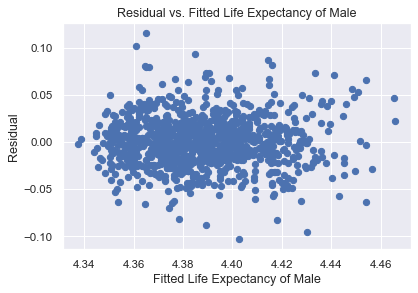

In [229]:
plt.scatter(model.fittedvalues, model.resid) # x and y all log
# adding title and labels
plt.xlabel('Fitted Life Expectancy of Male')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Life Expectancy of Male')
plt.show()

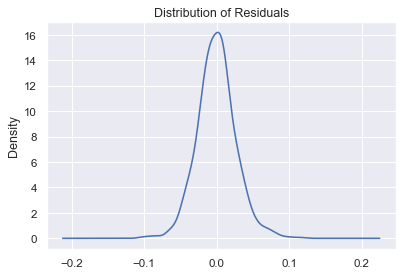

In [230]:
plt.figure()
#ols.fit().model is a method to access to the residual.
model.resid.plot.density()
plt.title('Distribution of Residuals')
plt.show()

## Female

In [203]:
model_f = sm.formula.ols('Life_expectancy_female ~ Total_annual_income + house_mean_price + crime_rate + PM_index + education', df_all_test).fit()
model_f.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Life_expectancy_female   R-squared:                       0.273
Model:                                OLS   Adj. R-squared:                  0.269
Method:                     Least Squares   F-statistic:                     69.80
Date:                    Tue, 18 Jan 2022   Prob (F-statistic):           4.76e-62
Time:                            05:13:16   Log-Likelihood:                -2025.4
No. Observations:                     937   AIC:                             4063.
Df Residuals:                         931   BIC:                             4092.
Df Model:                               5                                         
Covariance Type:                nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              78.1888      2.090     37.420      0.000      74.088      82.289
Total_annual_income  6.541e-05   9.85e-06      6.643      0.000    4.61e-05    8.47e-05
house_mean_price     2.335e-06   3.91e-07      5.976      0.000    1.57e-06     3.1e-06
crime_rate             -0.0016      0.001     -1.612      0.107      -0.004       0.000
PM_index                0.0066      0.018      0.360      0.719      -0.029       0.042
education               0.0040      0.002      2.161      0.031       0.000       0.008
==============================================================================
Omnibus:                        8.905   Durbin-Watson:                   1.766
Prob(Omnibus):                  0.012   Jarque-Bera (JB):                9.355
Skew:                           0.188   Prob(JB):                      0.00930
Kurtosis:                       3.312   Cond. No.                     1.46e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [187]:
p_value    = model_f.f_pvalue
R_squared  = model_f.rsquared
print("R_squared  =", R_squared)
print("p_value    =", p_value)

R_squared  = 0.2568470945498941
p_value    = 2.226991722157301e-58


In [198]:
model_f = sm.formula.ols('Life_expectancy_female.apply(np.log) ~ Total_annual_income.apply(np.log) + house_mean_price.apply(np.log) + crime_rate.apply(np.log) + PM_index.apply(np.log) + education.apply(np.log)', df_all_test).fit()
model_f.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     OLS Regression Results                                     
================================================================================================
Dep. Variable:     Life_expectancy_female.apply(np.log)   R-squared:                       0.286
Model:                                              OLS   Adj. R-squared:                  0.282
Method:                                   Least Squares   F-statistic:                     74.42
Date:                                  Tue, 18 Jan 2022   Prob (F-statistic):           1.23e-65
Time:                                          05:12:29   Log-Likelihood:                 2146.0
No. Observations:                                   937   AIC:                            -4280.
Df Residuals:                                       931   BIC:                            -4251.
Df Model:                                             5                                         
Covariance Type:                              nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                             3.7824      0.136     27.898      0.000       3.516       4.049
Total_annual_income.apply(np.log)     0.0261      0.007      3.650      0.000       0.012       0.040
house_mean_price.apply(np.log)        0.0209      0.003      7.037      0.000       0.015       0.027
crime_rate.apply(np.log)             -0.0064      0.002     -2.870      0.004      -0.011      -0.002
PM_index.apply(np.log)                0.0062      0.026      0.240      0.811      -0.045       0.057
education.apply(np.log)               0.0175      0.010      1.762      0.078      -0.002       0.037
==============================================================================
Omnibus:                        9.556   Durbin-Watson:                   1.790
Prob(Omnibus):                  0.008   Jarque-Bera (JB):               11.142
Skew:                           0.157   Prob(JB):                      0.00381
Kurtosis:                       3.432   Cond. No.                     3.24e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [232]:
# erase the PM
model_f = sm.formula.ols('Life_expectancy_female.apply(np.log) ~ Total_annual_income.apply(np.log) + house_mean_price.apply(np.log) + crime_rate.apply(np.log) + education.apply(np.log)', df_all).fit()
model_f.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     OLS Regression Results                                     
================================================================================================
Dep. Variable:     Life_expectancy_female.apply(np.log)   R-squared:                       0.265
Model:                                              OLS   Adj. R-squared:                  0.262
Method:                                   Least Squares   F-statistic:                     85.03
Date:                                  Tue, 18 Jan 2022   Prob (F-statistic):           1.11e-61
Time:                                          14:14:45   Log-Likelihood:                 2095.6
No. Observations:                                   947   AIC:                            -4181.
Df Residuals:                                       942   BIC:                            -4157.
Df Model:                                             4                                         
Covariance Type:                              nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                             3.7672      0.069     54.491      0.000       3.632       3.903
Total_annual_income.apply(np.log)     0.0353      0.007      4.811      0.000       0.021       0.050
house_mean_price.apply(np.log)        0.0194      0.003      7.161      0.000       0.014       0.025
crime_rate.apply(np.log)             -0.0040      0.002     -2.032      0.042      -0.008      -0.000
education.apply(np.log)               0.0099      0.011      0.932      0.351      -0.011       0.031
==============================================================================
Omnibus:                       66.480   Durbin-Watson:                   1.831
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.569
Skew:                           0.222   Prob(JB):                     7.81e-54
Kurtosis:                       5.450   Cond. No.                     1.48e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [210]:
p_value    = model_f.f_pvalue
R_squared  = model_f.rsquared
print("R_squared  =", R_squared)
print("p_value    =", p_value)

R_squared  = 0.26725568829832436
p_value    = 3.219294325959342e-60


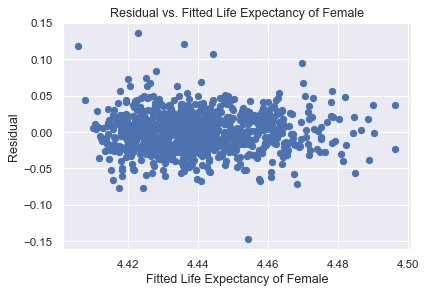

In [233]:
plt.scatter(model_f.fittedvalues, model_f.resid) # x and y all log
# adding title and labels
plt.xlabel('Fitted Life Expectancy of Female')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Life Expectancy of Female')
plt.show()

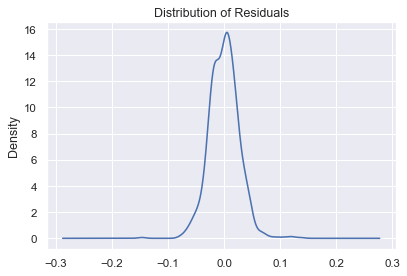

In [234]:
plt.figure()
#ols.fit().model is a method to access to the residual.
model_f.resid.plot.density()
plt.title('Distribution of Residuals')
plt.show()

### outlier

In [194]:
df_all_test = df_all.copy()

In [213]:
# 'Total_annual_income', 'house_mean_price', 'crime_rate', 'PM_index', 'education', 'Life_expectancy'
upper_limit = df_all_test['Life_expectancy_female'].quantile(0.995)
lower_limit = df_all_test['Life_expectancy_female'].quantile(0.005)

In [214]:
df_all_test=df_all_test[(df_all_test['Life_expectancy_female']<upper_limit)&(df_all_test['Life_expectancy_female']>lower_limit)]

In [220]:
# erase the PM
model_f = sm.formula.ols('Life_expectancy_female.apply(np.log) ~ Total_annual_income.apply(np.log) + house_mean_price.apply(np.log) + crime_rate.apply(np.log) + education.apply(np.log)', df_all_test).fit()
model_f.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     OLS Regression Results                                     
================================================================================================
Dep. Variable:     Life_expectancy_female.apply(np.log)   R-squared:                       0.252
Model:                                              OLS   Adj. R-squared:                  0.249
Method:                                   Least Squares   F-statistic:                     75.96
Date:                                  Tue, 18 Jan 2022   Prob (F-statistic):           1.56e-55
Time:                                          05:17:11   Log-Likelihood:                 2147.2
No. Observations:                                   907   AIC:                            -4284.
Df Residuals:                                       902   BIC:                            -4260.
Df Model:                                             4                                         
Covariance Type:                              nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                             3.9078      0.062     63.356      0.000       3.787       4.029
Total_annual_income.apply(np.log)     0.0223      0.006      3.454      0.001       0.010       0.035
house_mean_price.apply(np.log)        0.0184      0.002      7.599      0.000       0.014       0.023
crime_rate.apply(np.log)             -0.0073      0.002     -4.088      0.000      -0.011      -0.004
education.apply(np.log)               0.0142      0.009      1.513      0.131      -0.004       0.033
==============================================================================
Omnibus:                        2.719   Durbin-Watson:                   1.799
Prob(Omnibus):                  0.257   Jarque-Bera (JB):                2.638
Skew:                           0.088   Prob(JB):                        0.267
Kurtosis:                       2.803   Cond. No.                     1.50e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

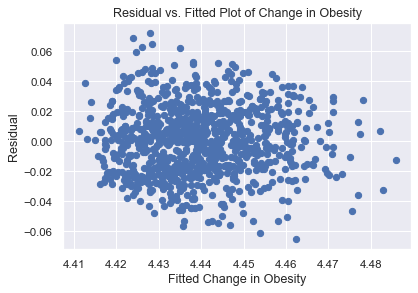

In [221]:
plt.scatter(model_f.fittedvalues, model_f.resid) # x and y all log
# adding title and labels
plt.xlabel('Fitted Change in Obesity')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot of Change in Obesity')
plt.show()

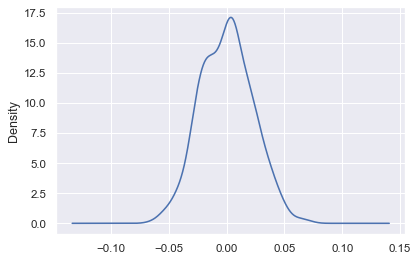

In [222]:
plt.figure()
#ols.fit().model is a method to access to the residual.
model_f.resid.plot.density()
plt.show()